## Load Dataset

In [1]:
import pandas as pd
import json

emotion_data = pd.read_csv('emotion.csv')
identification_data = pd.read_csv('data_identification.csv')

In [2]:
with open("tweets_DM.json", "r", encoding="utf-8") as file:
    tweets_data = pd.DataFrame(
        json.loads(line)["_source"]["tweet"]
        for line in file
    )
    
tweets_data.to_csv('tweets.csv', index=False)

In [3]:
tweet_data = pd.read_csv('tweets.csv')

## Exploratory Data Analysis

This step is to making sure that the data is loaded correctly and helps to understand the data structure.

In [4]:
tweet_data.head()

,hashtags,tweet_id,text
0,['Snapchat'],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"['freepress', 'TrumpLegacy', 'CNN']",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,['bibleverse'],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [5]:
emotion_data.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [6]:
identification_data.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [7]:
tweet_data.shape

(1867535, 3)

In [8]:
emotion_data.shape

(1455563, 2)

In [9]:
identification_data.shape

(1867535, 2)

## Data Preprocessing

### Check for Missing and Duplicate Data

This step is to make sure there are no missing values or duplicated data in the dataset. Based on the output there are no missing values nor duplicated data found so no need to perform any steps to handle missing value nor drop the duplicated data.

In [10]:
print("\033[1mMissing values by Column : \033[0m")
print("-"*30)
print(tweet_data.isna().sum())
print("-"*30)
print("Total Missing Values: ",tweet_data.isna().sum().sum())

Missing values by Column : 
------------------------------
hashtags    0
tweet_id    0
text        0
dtype: int64
------------------------------
Total Missing Values:  0


In [11]:
print("\033[1mMissing values by Column : \033[0m")
print("-"*30)
print(emotion_data.isna().sum())
print("-"*30)
print("Total Missing Values: ",emotion_data.isna().sum().sum())

Missing values by Column : 
------------------------------
tweet_id    0
emotion     0
dtype: int64
------------------------------
Total Missing Values:  0


In [12]:
print("\033[1mMissing values by Column : \033[0m")
print("-"*30)
print(identification_data.isna().sum())
print("-"*30)
print("Total Missing Values: ",identification_data.isna().sum().sum())

Missing values by Column : 
------------------------------
tweet_id          0
identification    0
dtype: int64
------------------------------
Total Missing Values:  0


In [13]:
print("Duplicate tweet_id:")
print("Tweet Data:", tweet_data.duplicated(subset=['tweet_id']).sum())
print("Emotion Data:", emotion_data.duplicated(subset=['tweet_id']).sum())
print("Identification Data:", identification_data.duplicated(subset=['tweet_id']).sum())


Duplicate tweet_id:
Tweet Data: 0
Emotion Data: 0
Identification Data: 0


### Merging Data

Identify the shape of the data before merging and ensure the same number of data is shown after merging.
This merging is separate into test set merge and training set merge. They are merged separately as they have different data shape and different attributes. Train data has the emotion label to carry out supervised learning.

In [14]:
test_set = identification_data[identification_data['identification'] == 'test']
test_set.shape


(411972, 2)

In [15]:
# Merge to get test tweets
test_tweets = test_set.merge(tweet_data, on='tweet_id', how='inner')
test_tweets.shape



(411972, 4)

In [16]:
test_tweets.head()

,tweet_id,identification,hashtags,text
0,0x28cc61,test,[],@Habbo I've seen two separate colours of the e...
1,0x2db41f,test,[],@FoxNews @KellyannePolls No serious self respe...
2,0x2466f6,test,['womendrivers'],"Looking for a new car, and it says 1 lady owne..."
3,0x23f9e9,test,['robbingmembers'],@cineworld “only the brave” just out and fount...
4,0x1fb4e1,test,[],Felt like total dog 💩 going into open gym and ...


In [17]:
train_set = identification_data[identification_data['identification'] == 'train']
train_data = train_set.merge(tweet_data, on='tweet_id', how='inner').merge(emotion_data, on='tweet_id', how='inner')

train_data.shape

(1455563, 5)

In [18]:
train_data.head()

,tweet_id,identification,hashtags,text,emotion
0,0x29e452,train,[],Huge Respect🖒 @JohnnyVegasReal talking about l...,joy
1,0x2b3819,train,"['spateradio', 'app']",Yoooo we hit all our monthly goals with the ne...,joy
2,0x2a2acc,train,[],@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...,trust
3,0x2a8830,train,"['PUBG', 'GamersUnite', 'twitch', 'BeHealthy',...",Come join @ambushman27 on #PUBG while he striv...,joy
4,0x20b21d,train,"['strength', 'bones', 'God']",@fanshixieen2014 Blessings!My #strength little...,anticipation


### Data Visualization

A barplot is plotted to show the distribution of the emotion count in the train data. The visualization has shown that the number of joy has a huge difference from the other emotion. This shows that this is an imbalanced data. 

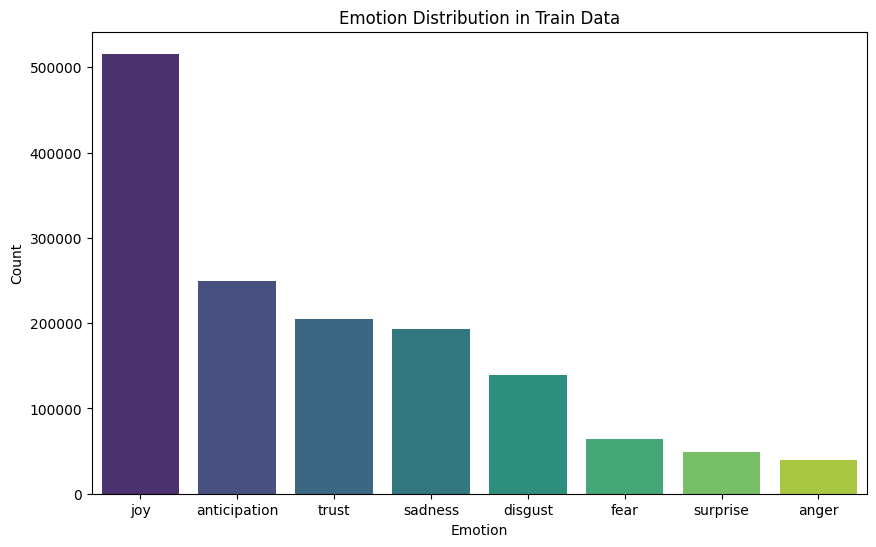

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion_count_train = train_data['emotion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_count_train.index, y=emotion_count_train.values, palette="viridis")
plt.title("Emotion Distribution in Train Data")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

In [21]:
emotion_count_train

emotion
joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: count, dtype: int64

### Text Preprocessing

Stemming is carried out to stem the word in a sentence to its base word. This can help to increase accuracy. Besides, stopwords such as "a", "an", "the" will be removed. Tokenization also been carried out where the words are converted to lowercase.
The preprocess_text function will tokenize the words in sentence with stemming and remove stopwords.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # tokenization
    word_tokens = word_tokenize(text)
    # stemming
    filtered_sentence = [stemmer.stem(w.lower()) for w in word_tokens if w.lower() not in stop_words]
    return ' '.join(filtered_sentence)

train_data['processed_text'] = train_data['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(train_data['processed_text'])



### Splitting Data into Training and Testing Sets

The train data is splitted into training and testing sets where 80% of it is used for training and the other 20% is used for testing. This step is important to build model. Each model will use the X_train and y_train to evaluate the performance on X_test and y_test.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, train_data['emotion'], test_size=0.2, random_state=42)


## Build Classification Model

### Linear Support Vector Classifier 

There are two models built using Linear Support Vector Classifier. One model is without class weight balancing while the another one is with class weight balancing. The model without the class weight balancing gets a higher overall accuracy. The recall of anger and surprise from the model without balancing is much lower comapred to the other emotion. This is because they are the minority classes in the data and is hard for the model to classify them correctly. The emotion joy has the highest recall as it is the majority class and the model can train well to classify it correctly. On the other hand, the recall of each emotion is more balance in the model with class weight balancing. Both the recall of anger and sadness have increased, however the recall of joy has a slight decrease as all the classes are balanced and the performance spread across all classes. 

In [24]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5492437644488566
              precision    recall  f1-score   support

       anger       0.55      0.24      0.33      7964
anticipation       0.60      0.55      0.57     49725
     disgust       0.48      0.40      0.43     27892
        fear       0.64      0.39      0.49     12955
         joy       0.55      0.79      0.65    103089
     sadness       0.52      0.46      0.49     38835
    surprise       0.56      0.23      0.32      9750
       trust       0.53      0.32      0.40     40903

    accuracy                           0.55    291113
   macro avg       0.55      0.42      0.46    291113
weighted avg       0.55      0.55      0.53    291113



In [25]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

svc = LinearSVC(class_weight='balanced')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5168851957830808
              precision    recall  f1-score   support

       anger       0.22      0.43      0.29      7964
anticipation       0.59      0.57      0.58     49725
     disgust       0.42      0.45      0.43     27892
        fear       0.37      0.52      0.43     12955
         joy       0.64      0.61      0.63    103089
     sadness       0.50      0.45      0.47     38835
    surprise       0.25      0.35      0.29      9750
       trust       0.48      0.39      0.43     40903

    accuracy                           0.52    291113
   macro avg       0.43      0.47      0.44    291113
weighted avg       0.53      0.52      0.52    291113



### Logistic Regression

There are two models built using Logistic Regression. One model is without class weight balancing while the another one is with class weight balancing. The results of both models are almost the same as the Linear Support Vector Classifier. However, logistic regression without class weight balance gets a slightly higher acccuracy compared to LinearSVC without class weight balance. This is because logistic regression can handle imbalance data better as it is probabilistic based which normalizes probabilities across all classes. LinearSVC is sensitive to class imbalance and will cause the minority class to have low performance. 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression(max_iter=1000)  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5553788391449368
              precision    recall  f1-score   support

       anger       0.63      0.23      0.33      7964
anticipation       0.63      0.53      0.58     49725
     disgust       0.50      0.40      0.44     27892
        fear       0.72      0.37      0.49     12955
         joy       0.54      0.83      0.65    103089
     sadness       0.53      0.47      0.49     38835
    surprise       0.65      0.21      0.32      9750
       trust       0.58      0.30      0.39     40903

    accuracy                           0.56    291113
   macro avg       0.60      0.42      0.46    291113
weighted avg       0.57      0.56      0.53    291113



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression(max_iter=1000, class_weight='balanced')  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.48955903721235394
              precision    recall  f1-score   support

       anger       0.20      0.49      0.28      7964
anticipation       0.59      0.57      0.58     49725
     disgust       0.40      0.48      0.44     27892
        fear       0.33      0.55      0.41     12955
         joy       0.71      0.48      0.57    103089
     sadness       0.51      0.43      0.47     38835
    surprise       0.21      0.42      0.28      9750
       trust       0.43      0.47      0.45     40903

    accuracy                           0.49    291113
   macro avg       0.42      0.49      0.43    291113
weighted avg       0.55      0.49      0.50    291113



### Multinomial Naive Bayes

The low accuracy but high recall of the majority class joy shows that the model tends to overpredict joy bacause it is the largest class. The minority classes which are the anger and surprise have a perfect precision and very low recall. This is because they have less data and cause less prediction to be done on them and just nice all the predictions are correct resulting a perfect precision score. Imbalance data making this model not suitable to be used as this model assume feature independence and might not match with the feature here as each feature might be realated to express an emotion. Besides, this model cannot distinguish feature overlap such as angry and frustrating.

In [28]:
# multionomial naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.46355538914442157
              precision    recall  f1-score   support

       anger       1.00      0.08      0.15      7964
anticipation       0.76      0.32      0.45     49725
     disgust       0.69      0.09      0.16     27892
        fear       0.98      0.07      0.14     12955
         joy       0.41      0.97      0.58    103089
     sadness       0.59      0.28      0.38     38835
    surprise       1.00      0.08      0.15      9750
       trust       0.83      0.08      0.15     40903

    accuracy                           0.46    291113
   macro avg       0.78      0.25      0.27    291113
weighted avg       0.64      0.46      0.38    291113



### Output csv file

The model that output the highest accuracy which is the logisic regression without class weight balance is chosen to output the csv file. Firstly, preprocess the text in test_tweets which will remove the punctuation, remove stopwords and covnert the text into lowercase. Then, vectorize the text into numerical feature and then the trained logistic model is used to predict the emotion.

In [30]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

test_tweets['processed_text'] = test_tweets['text'].apply(preprocess_text)

X_test_final = vectorizer.transform(test_tweets['processed_text'])

y_pred_test = lr.predict(X_test_final)

submission_df = pd.DataFrame({
    'id': test_tweets['tweet_id'],
    'emotion': y_pred_test
})

submission_df.to_csv('sampleSubmission.csv', index=False)

print("Successfully save the file")


Successfully save the file
